#Importing the Necessary Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, UpSampling2D
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Loading and Preprocessing MNIST Data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype('float32') / 255
train_images = np.reshape(train_images, (len(train_images), 28, 28, 1))

test_images = test_images.astype('float32') / 255
test_images = np.reshape(test_images, (len(test_images), 28, 28, 1))

test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

train_images = np.array([cv2.resize(img, (32, 32)) for img in train_images])
test_images = np.array([cv2.resize(img, (32, 32)) for img in test_images])
val_images = np.array([cv2.resize(img, (32, 32)) for img in val_images])

train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
val_images = np.expand_dims(val_images, axis=-1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(60000, 32, 32, 1)
(5000, 32, 32, 1)
(5000, 32, 32, 1)


#Displaying Samples from Training Data

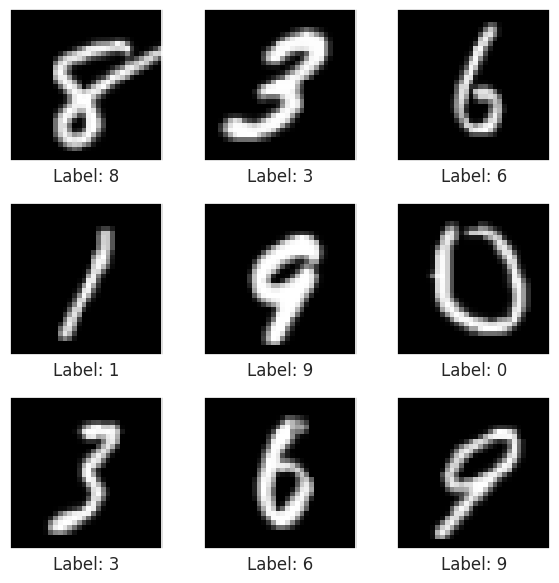

In [ ]:
indices = np.random.randint(0, len(train_images), 9)

plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[indices[i]].reshape(32, 32), cmap='gray')
    plt.xlabel("Label: {}".format(train_labels[indices[i]]))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

#Data Augmentation with ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest')

training_set = datagen.flow(train_images, train_labels, batch_size=64)

#Convolutional Neural Network (CNN)

##Creating CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

##Compiling and Training the CNN Model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_set, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
938/938 [==============================] - 30s 26ms/step - loss: 0.3369 - accuracy: 0.8938 - val_loss: 0.0482 - val_accuracy: 0.9850
Epoch 2/10
938/938 [==============================] - 25s 26ms/step - loss: 0.1130 - accuracy: 0.9649 - val_loss: 0.0443 - val_accuracy: 0.9848
Epoch 3/10
938/938 [==============================] - 24s 26ms/step - loss: 0.0857 - accuracy: 0.9738 - val_loss: 0.0302 - val_accuracy: 0.9914
Epoch 4/10
938/938 [==============================] - 24s 26ms/step - loss: 0.0706 - accuracy: 0.9776 - val_loss: 0.0301 - val_accuracy: 0.9906
Epoch 5/10
938/938 [==============================] - 25s 26ms/step - loss: 0.0608 - accuracy: 0.9813 - val_loss: 0.0235 - val_accuracy: 0.9930
Epoch 6/10
938/938 [==============================] - 25s 26ms/step - loss: 0.0560 - accuracy: 0.9829 - val_loss: 0.0251 - val_accuracy: 0.9928
Epoch 7/10
938/938 [==============================] - 25s 26ms/step - loss: 0.0520 - accuracy: 0.9842 - val_loss: 0.0201 - val_accuracy:

##Evaluating Model on Test Data

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: {:.2f}%'.format(test_acc*100))

157/157 [==============================] - 1s 4ms/step - loss: 0.0193 - accuracy: 0.9926
Test accuracy: 99.26%


In [ ]:
predicted_labels = model.predict(test_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

class_report = classification_report(test_labels, predicted_labels, target_names=[str(i) for i in range(10)])
print("Classification Report:\n")
print(class_report)

157/157 [==============================] - 0s 2ms/step
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       0.99      0.99      0.99       574
           2       1.00      0.99      0.99       508
           3       0.98      1.00      0.99       487
           4       1.00      0.99      0.99       481
           5       1.00      0.99      0.99       477
           6       1.00      0.99      0.99       464
           7       0.99      0.99      0.99       532
           8       0.99      1.00      0.99       494
           9       0.98      0.99      0.99       497

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



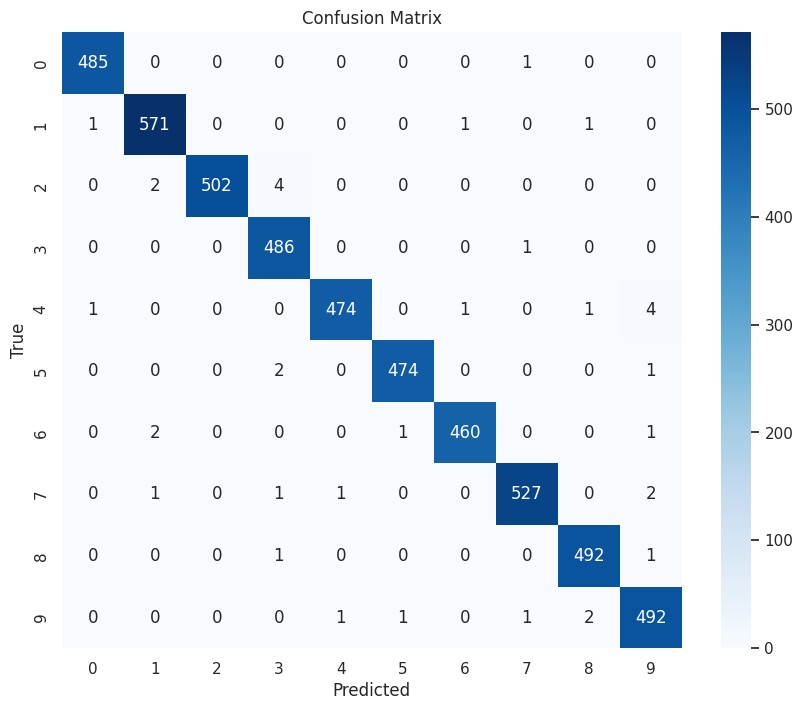

In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

##Training and Validation Metrics Visualization

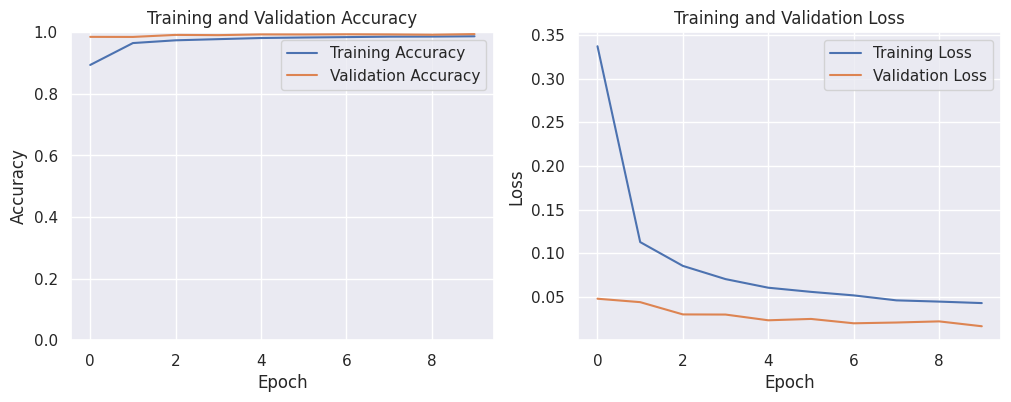

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

##Random Sample Image Classification Results

1/1 [==============================] - 0s 122ms/step


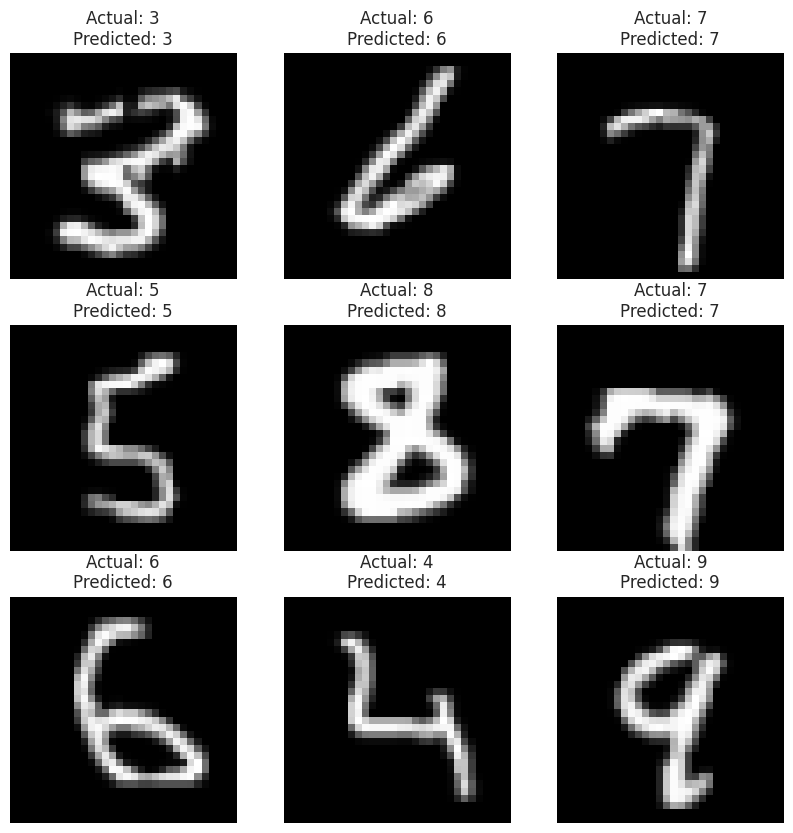

In [ ]:
random_indices = np.random.choice(test_images.shape[0], 9)
random_images = test_images[random_indices]
random_labels = test_labels[random_indices]

predicted_labels = model.predict(random_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(random_images[i].reshape(32, 32), cmap='gray')
    plt.axis('off')
    plt.title(f'Actual: {random_labels[i]}\nPredicted: {predicted_labels[i]}')

plt.show()

#Autoencoders

##Convolutional Autoencoder

In [ ]:
input_img = Input(shape=(32, 32, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x= MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

print(autoencoder.summary())

autoencoder.fit(train_images, train_images, epochs=10, batch_size=64, shuffle=True, validation_data=(val_images, val_images))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 8)           584   

##Classifier Training on Encoded Features from Autoencoder

In [ ]:
encoder = Model(input_img, encoded)

classifier_input = Input(shape=(4, 4, 8))
x = Flatten()(classifier_input)
x = Dense(128, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
classifier = Model(classifier_input, x)

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(classifier.summary())

encoded_train = encoder.predict(train_images)
encoded_val = encoder.predict(val_images)
encoded_test= encoder.predict(test_images)

history= classifier.fit(encoded_train, train_labels, epochs=10, batch_size=64, validation_data=(encoded_val, val_labels))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 17802 (69.54 KB)
Trainable params: 17802 (69.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
157/157 [==============================] - 0s 2ms/step
Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 0.5687 - accuracy: 0.

##Evaluate Classifier on Test Data using Encoded Features

In [ ]:
test_loss, test_accuracy = classifier.evaluate(encoded_test, test_labels, verbose=0)
print('Test accuracy: {:.2f}%'.format(test_accuracy*100))

Test accuracy: 96.48%


In [ ]:
predicted_labels = classifier.predict(encoded_test)
predicted_labels = np.argmax(predicted_labels, axis=1)

class_report = classification_report(test_labels, predicted_labels, target_names=[str(i) for i in range(10)])
print("Classification Report:\n")
print(class_report)

157/157 [==============================] - 0s 2ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       486
           1       0.99      0.99      0.99       574
           2       0.97      0.97      0.97       508
           3       0.93      0.97      0.95       487
           4       0.94      0.98      0.96       481
           5       0.98      0.92      0.95       477
           6       0.99      0.95      0.97       464
           7       0.98      0.96      0.97       532
           8       0.92      0.97      0.95       494
           9       0.96      0.94      0.95       497

    accuracy                           0.96      5000
   macro avg       0.97      0.96      0.96      5000
weighted avg       0.97      0.96      0.96      5000



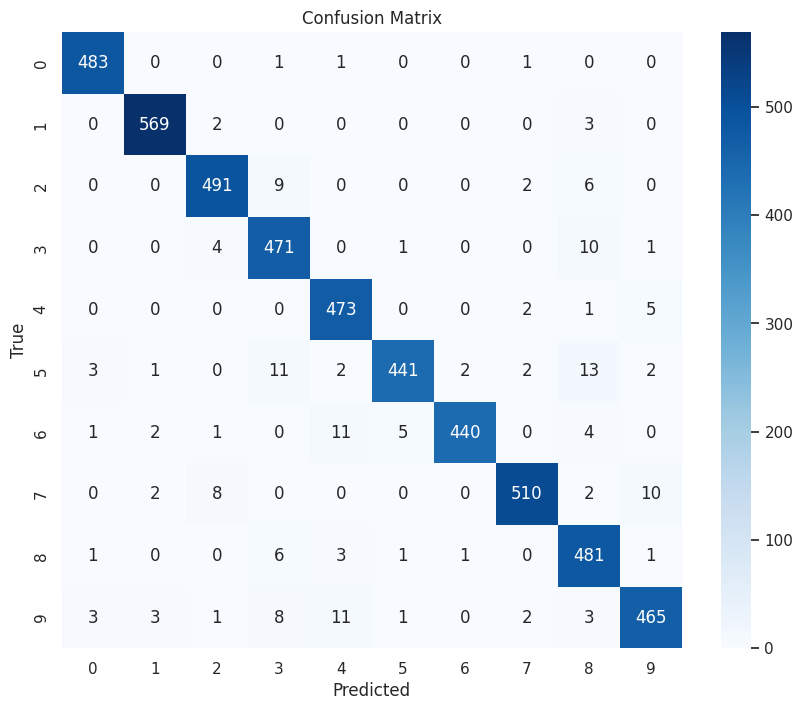

In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

##Training and Validation Metrics Visualization

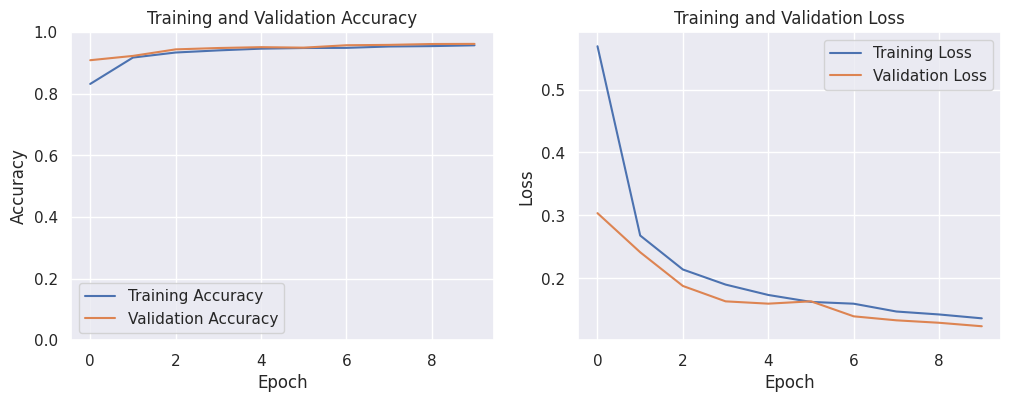

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

##Random Sample Image Classification Results

1/1 [==============================] - 0s 53ms/step


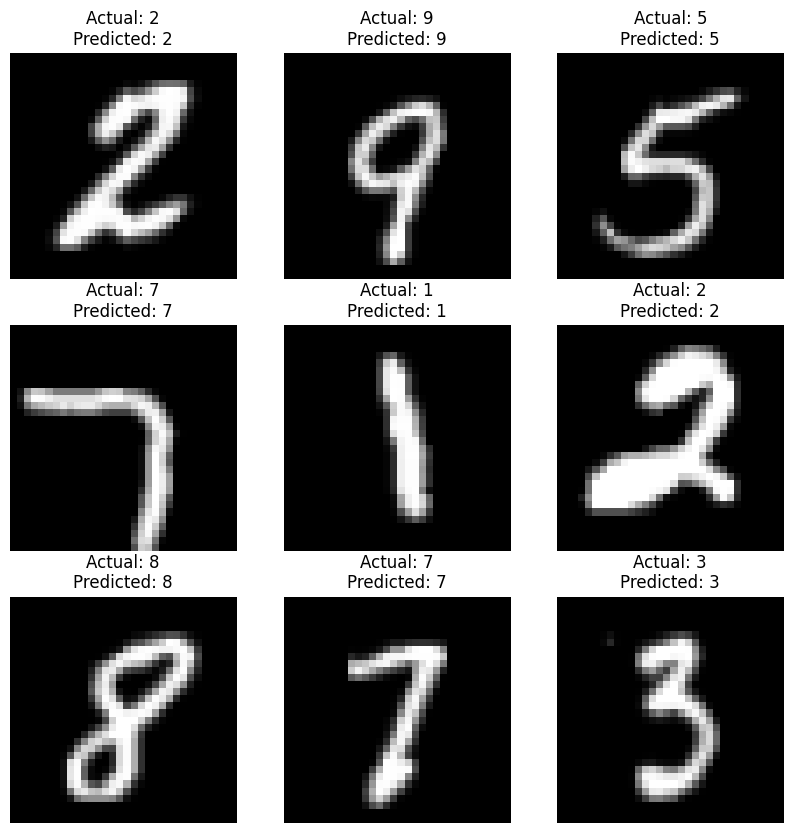

In [ ]:
random_indices = np.random.choice(test_images.shape[0], 9)
random_images = test_images[random_indices]
random_labels = test_labels[random_indices]

predicted_labels = classifier.predict(encoder.predict(random_images))
predicted_labels = np.argmax(predicted_labels, axis=1)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(random_images[i].reshape(32, 32), cmap='gray')
    plt.axis('off')
    plt.title(f'Actual: {random_labels[i]}\nPredicted: {predicted_labels[i]}')

plt.show()